### Handwritten digit classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the handwritten digit dataset from keras package

In [2]:
from keras.datasets import mnist

In [5]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [6]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
xtrain.shape

(60000, 28, 28)

In [9]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
xtest.shape

(10000, 28, 28)

In [11]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Viewing above image

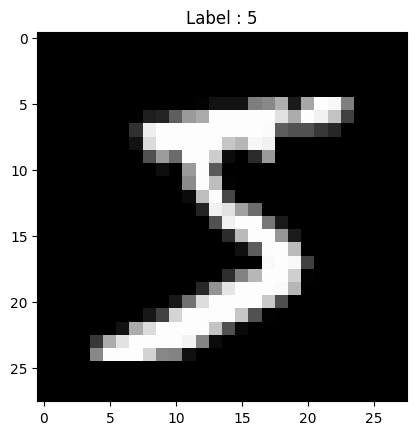

In [14]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.title(f'Label : {ytrain[0]}')
plt.show()

In [15]:
ytrain[0]

5

### Showing top 9 images from xtrain along with labels

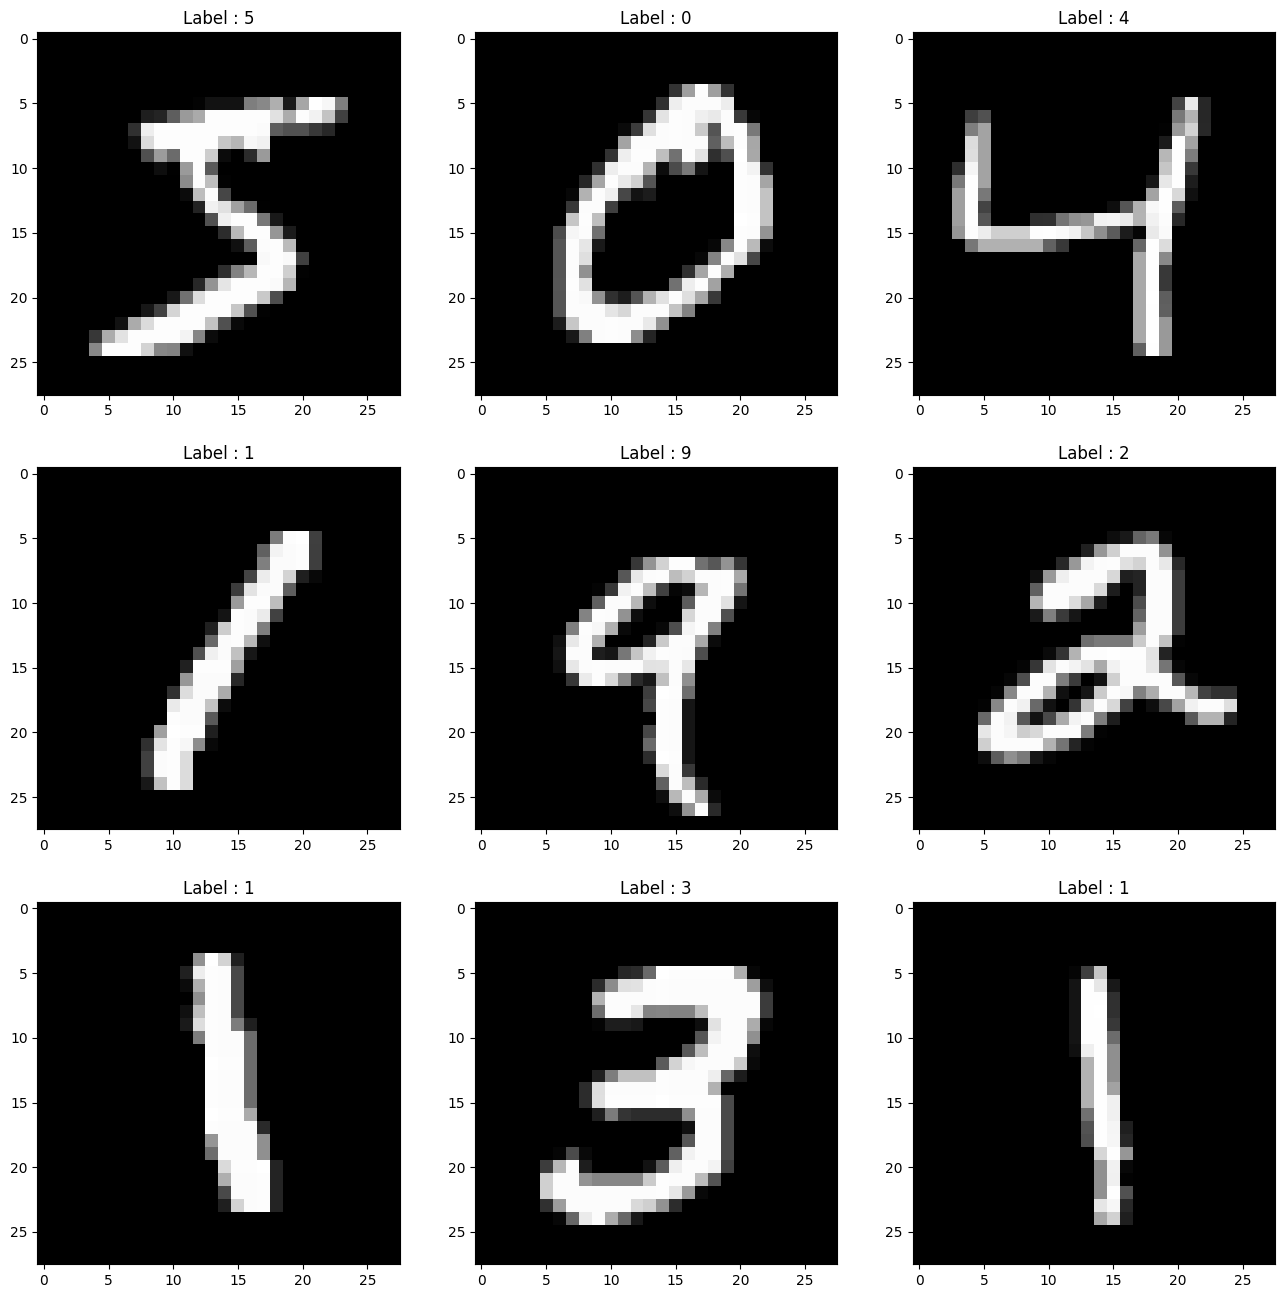

In [16]:
plt.figure(figsize=(16,16))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Label : {ytrain[i]}')
plt.show()


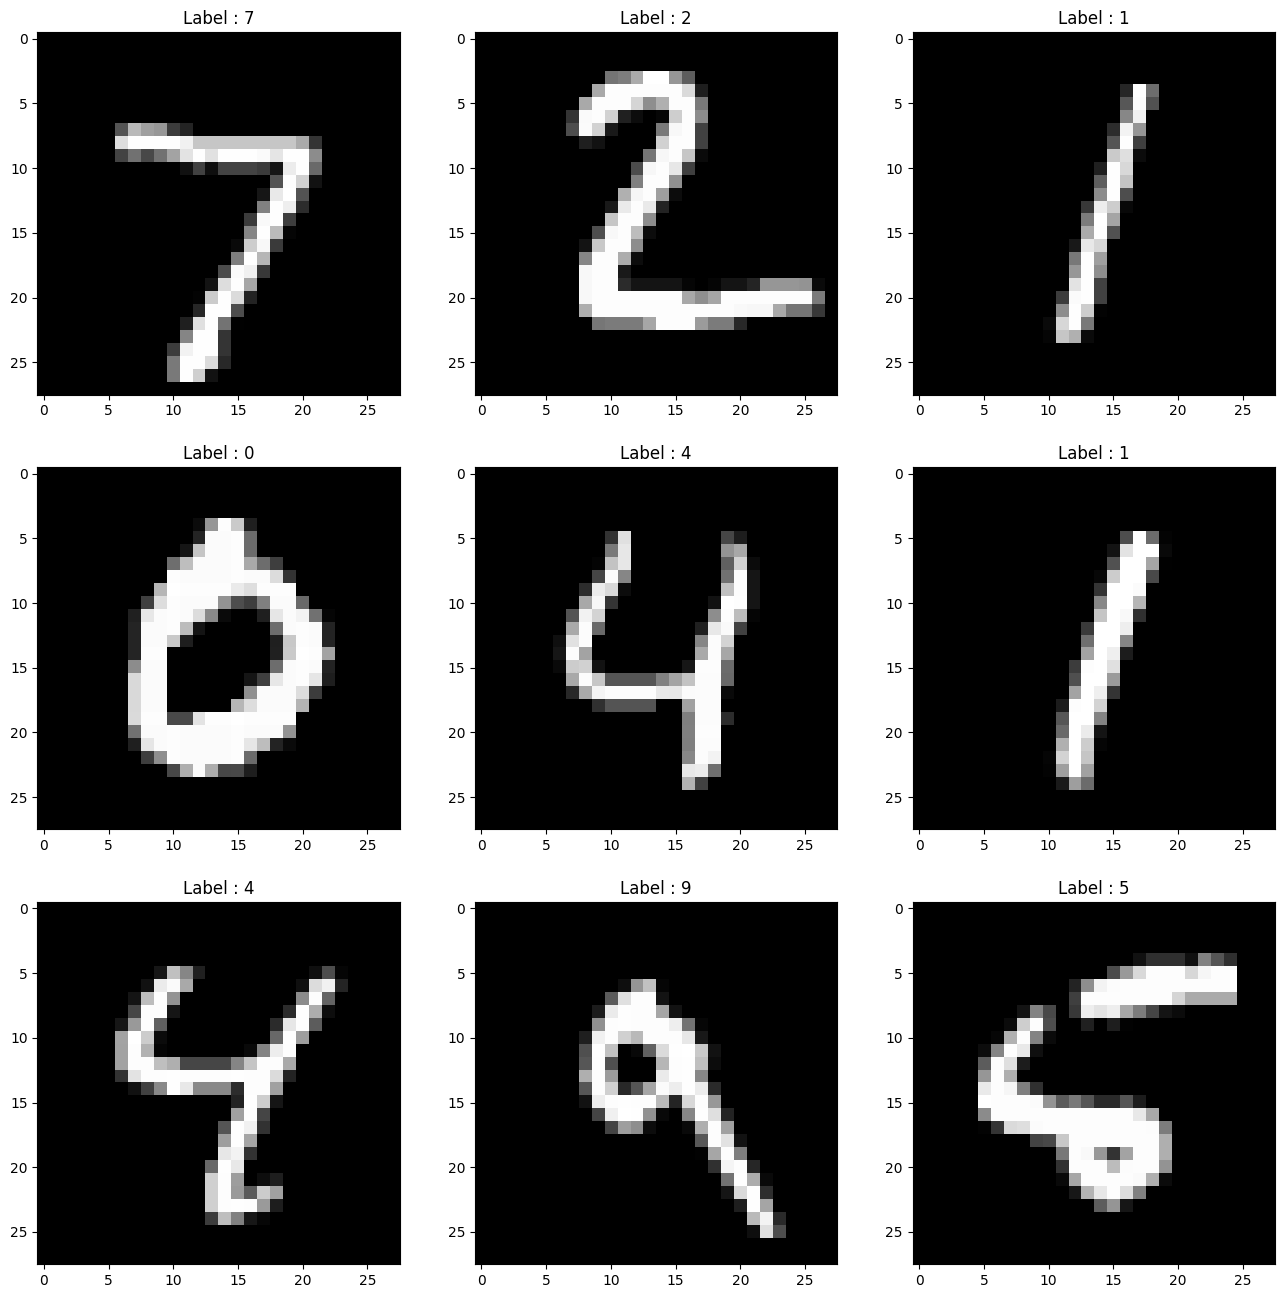

In [18]:
plt.figure(figsize=(16,16))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtest[i], cmap='gray')
    plt.title(f'Label : {ytest[i]}')
plt.show()

### Visualizing image from seaborn

In [19]:
xtest[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
import seaborn as sns

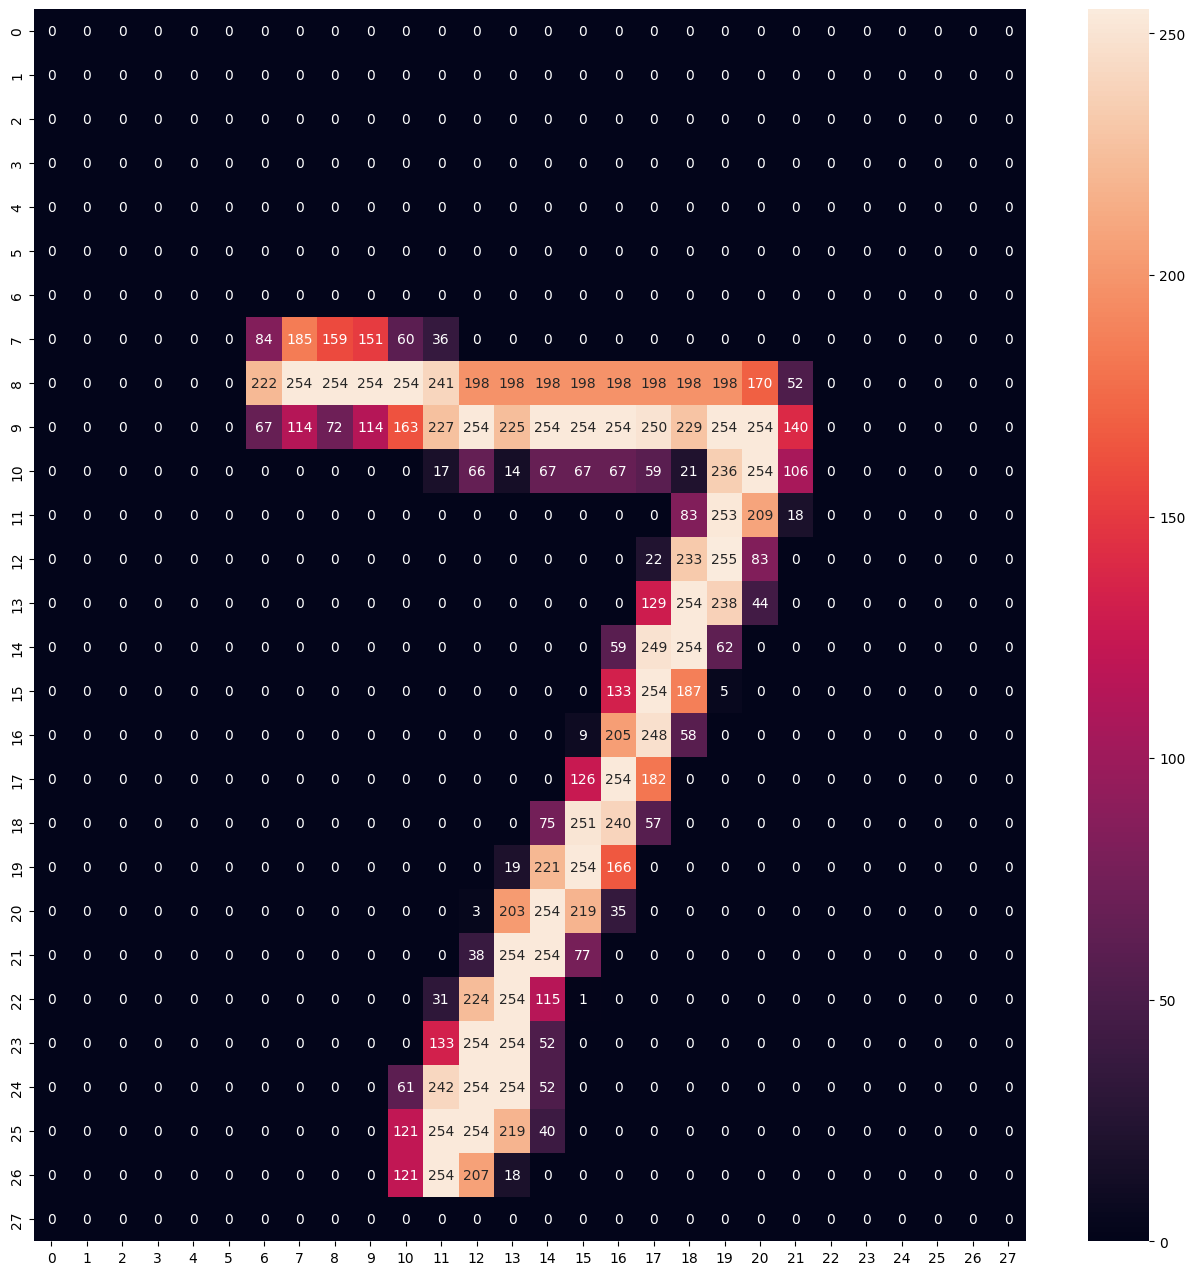

In [21]:
plt.figure(figsize=(16,16))
sns.heatmap(xtest[0], annot=True, fmt='d')
plt.show()

### Preprocess the image
Image pixel belong from 0-255

divide data bt 255 to scale image values from 0-1

In [22]:
xtrain_scl = xtrain/255
xtest_scl = xtest/255

In [23]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [29]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
ytrain_cat[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Build the CNN (Convolutional Neural Network)
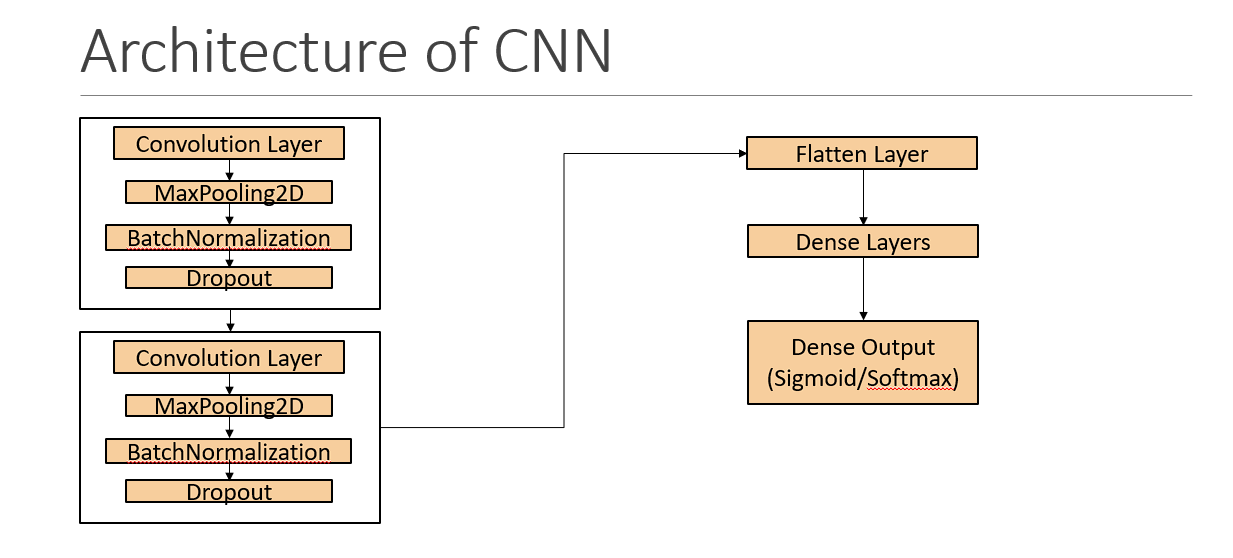

In [32]:
xtrain.shape

(60000, 28, 28)

In [35]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping


In [37]:
model = Sequential()

# First convolution Layer 
model.add(Convolution2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second Convolutional Layer
model.add(Convolution2D(filters=16, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Flatten Layer
model.add(Flatten())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 13, 13, 16)        64        
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)         

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [41]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=100, callbacks=[early_stop])

Epoch 1/100
1500/1500 [==============================] - 26s 16ms/step - loss: 0.2037 - accuracy: 0.9355 - val_loss: 0.0872 - val_accuracy: 0.9746
Epoch 2/100
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0822 - accuracy: 0.9736 - val_loss: 0.0652 - val_accuracy: 0.9816
Epoch 3/100
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0632 - accuracy: 0.9796 - val_loss: 0.0559 - val_accuracy: 0.9838
Epoch 4/100
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0535 - accuracy: 0.9829 - val_loss: 0.0484 - val_accuracy: 0.9851
Epoch 5/100
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0424 - val_accuracy: 0.9884
Epoch 6/100
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0415 - accuracy: 0.9860 - val_loss: 0.0470 - val_accuracy: 0.9872
Epoch 7/100
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0

### Plot the learning curve

AttributeError: module 'matplotlib.pyplot' has no attribute 'Show'

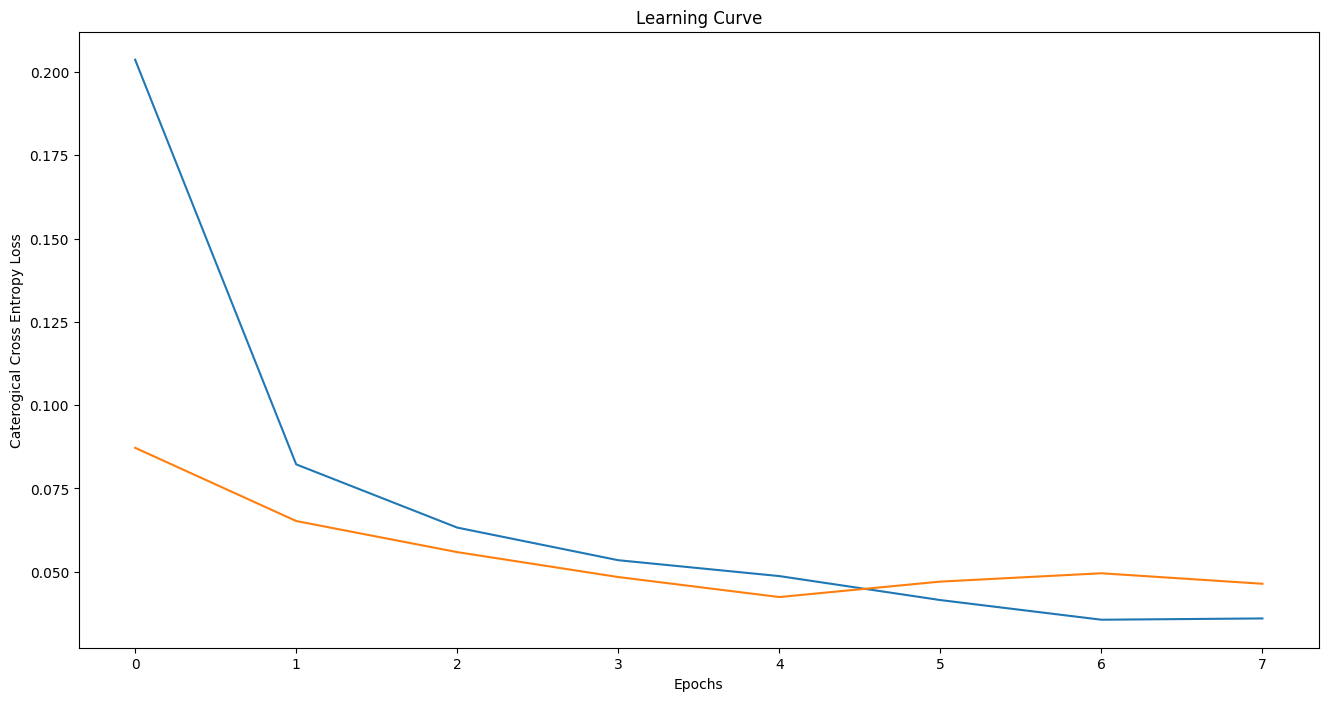

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Caterogical Cross Entropy Loss')
plt.Show()

### Evaluating the model

In [44]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0223 - accuracy: 0.9933


[0.022316202521324158, 0.9932666420936584]

In [45]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0443 - accuracy: 0.9873


[0.044339098036289215, 0.9872999787330627]

### Predicting the image label

In [46]:
yprob_tr = model.predict(xtrain_scl)
yprob_tr[0:5]

1875/1875 [==============================] - 8s 4ms/step


array([[9.2892444e-11, 6.3392719e-07, 1.5604648e-09, 4.3290626e-02,
        2.5668625e-11, 9.5670700e-01, 4.2590811e-10, 4.2861988e-08,
        1.2754979e-06, 3.0641885e-07],
       [1.0000000e+00, 2.3038496e-11, 2.2620888e-10, 7.8596907e-10,
        5.0349162e-13, 9.6540809e-13, 2.0171750e-08, 1.4926538e-13,
        8.1338720e-11, 7.1050416e-10],
       [3.9685243e-15, 2.9023055e-11, 4.2403112e-11, 3.7314292e-14,
        9.9999928e-01, 1.0342628e-11, 2.4949203e-14, 4.0547140e-12,
        4.9768323e-10, 7.2659475e-07],
       [2.9327088e-10, 1.0000000e+00, 1.5722096e-08, 1.3054855e-11,
        5.7748295e-09, 2.6057027e-08, 1.3696789e-09, 3.6644932e-09,
        3.7917940e-09, 1.5965363e-11],
       [8.6813605e-09, 4.2067722e-07, 6.4460215e-07, 1.9464993e-05,
        6.2607457e-03, 7.9566155e-07, 7.7064755e-08, 1.2620518e-04,
        1.1727401e-03, 9.9241889e-01]], dtype=float32)

In [47]:
yprob_tr[0]

array([9.2892444e-11, 6.3392719e-07, 1.5604648e-09, 4.3290626e-02,
       2.5668625e-11, 9.5670700e-01, 4.2590811e-10, 4.2861988e-08,
       1.2754979e-06, 3.0641885e-07], dtype=float32)

In [49]:
ypred_tr = np.argmax(yprob_tr, axis=-1)

In [50]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [52]:
yprob_ts = model.predict(xtest_scl)
yprob_ts[0:5]

313/313 [==============================] - 1s 5ms/step


array([[9.4313737e-14, 3.0026996e-08, 7.5144669e-08, 7.2943056e-09,
        6.4917675e-11, 1.8289911e-13, 1.2997372e-13, 9.9999988e-01,
        1.5164444e-11, 3.1650271e-09],
       [7.3690998e-11, 9.9654009e-09, 1.0000000e+00, 1.6867119e-12,
        1.6503274e-13, 1.5832666e-18, 3.2681895e-12, 3.1535497e-12,
        1.1363946e-12, 3.6452259e-16],
       [2.8946632e-09, 9.9999952e-01, 6.0684648e-08, 1.6526421e-09,
        5.7256180e-08, 2.4048327e-07, 3.6753079e-08, 1.2539040e-07,
        4.5124359e-08, 3.3555742e-10],
       [9.9880922e-01, 2.5189277e-06, 9.1626680e-09, 4.7954586e-06,
        2.0632603e-08, 2.0007249e-06, 1.1797177e-03, 1.7432393e-07,
        4.2534560e-07, 1.1033353e-06],
       [1.7768728e-13, 2.5609912e-13, 8.4018972e-12, 1.4460558e-14,
        1.0000000e+00, 6.5425061e-12, 9.8742655e-12, 2.7057486e-11,
        2.0743726e-10, 8.0270439e-09]], dtype=float32)

In [53]:
ypred_ts = np.argmax(yprob_ts, axis=-1)
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [55]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot confusion matrix

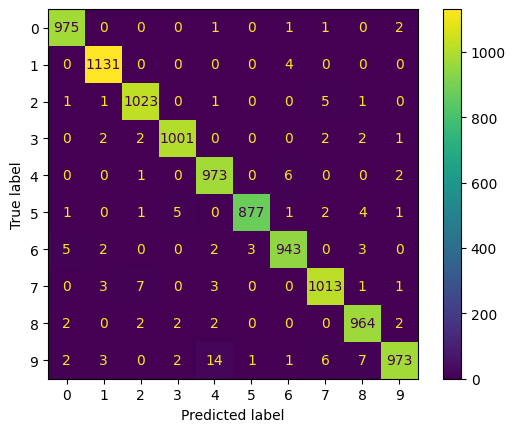

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [57]:
len(ytest)

10000

### Print Clasisfication Report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Saving the model for future use

In [60]:
model.save('HandwrittenModel.keras')

### Loading model for another notebooks

In [61]:
from keras.models import load_model
nn = load_model('HandwrittenModel.keras')

In [62]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 13, 13, 16)        64        
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)         